# k-means(k平均法)のPythonによるフルスクラッチ

### アルゴリズムの実態

0. kを決める
1. 初期値をk個決定する
2. 重心に近い点を決定する
3. それぞれの重心にそれぞれの重心を移動する（パワーワード感）
4. 2~3.を繰り返す
5. kを変更して1に戻る

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## ダミーデータを作成する

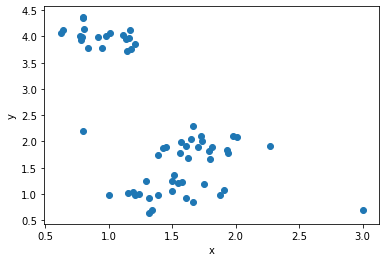

In [3]:
n_data0 = 20             #1.データの数
n_data1 = 20
n_data2 = 20

mean0 = [1, 4]          #2.データ０における平均値（ｘ、ｙ）
mean1 = [1.8, 2]
mean2 = [1.4, 1]
noise = [[0.8, 2.2],
         [3.0, 0.7]]


cov0  = [[0.04, 0.0],
         [0.0, 0.04]]    #3.データ０における共分散行列
cov1  = [[0.04, 0.0],
         [0.0, 0.04]]
cov2  = [[0.04, 0.0],
         [0.0, 0.04]]


#二次元正規分布を生成する（0~3の値によって変動する）
X0 = np.random.multivariate_normal(mean0, cov0, n_data0)
X1 = np.random.multivariate_normal(mean1, cov1, n_data1)
X2 = np.random.multivariate_normal(mean2, cov2, n_data2)

#それぞれのデータの結合
X = np.concatenate((X0, X1, X2, noise))

plt.scatter(X[:,0],X[:,1],)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
class kmeans():
    def __init__(self,plus=False):
        self.plus = plus
        
    def clustering(self):
        dist_list = [0]*self.k
        for c in range(self.k):
            dist_list[c] = np.sum((self.X-self.center[c])**2,axis=1)
            
        self.cluster = np.argmin(np.array(dist_list),axis=0)
    
    #fiding centers
    def fit(self,X,k):
        self.X = X
        self.k = k
        n_sample = X.shape[0]
        n_dims = X.shape[1]
        
        if self.plus == False:
            self.center = X[np.random.choice(np.arange(0,n_sample),k),:]
            print(self.center)
        else:
            distance = np.zeros((n_sample,k))
            #最初の重心決定確率は一律
            pr = np.ones(n_sample)/n_sample
            self.center = np.zeros((k,n_dims))
            print(self.center)
            self.center[0,:] = X[np.random.choice(np.arange(0,n_sample),1,p=pr),:]
            for c in range(1,k):
                flag = True
                while flag:
                    #重心決定
                    center_candidate = X[np.random.choice(np.arange(0,n_sample),1,p=pr),:]
                    flag = np.any(self.center == center_candidate) #すでに選ばれた重心なら、もう一度探索
                print(center_candidate)
                self.center[c] = center_candidate

                #距離を求める
                distance[:,c] = (np.sum((X-self.center[c])**2,axis=1))**0.5
                #重心決定の確率更新
                pr = np.sum(distance,axis=1) / np.sum(distance)
            print(self.center)

        old_center = np.array([np.inf for i in range(n_dims)])
        while np.sum(((old_center-self.center)**2))**0.5 > 10e-8:
            self.clustering()

            old_center = self.center.copy()
            plt.figure(figsize=(5,5))
            plt.xlim(0,5)
            plt.ylim(0,5)
            plt.scatter(X[:,0], X[:,1],c=self.cluster)
            plt.scatter(self.center[:,0], self.center[:,1],s=10,c="r")
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()

            #重心を更新
            for i in list(set(self.cluster)):
                self.center[i] = np.mean(X[self.cluster==i],axis=0)
                    

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.75061444 1.18286756]]
[[0.63813265 4.12126829]]
[[1.64873855 2.05084892]]
[[0.8 2.2]]
[[1.66440721 0.84947979]
 [1.75061444 1.18286756]
 [0.63813265 4.12126829]
 [1.64873855 2.05084892]
 [0.8        2.2       ]]


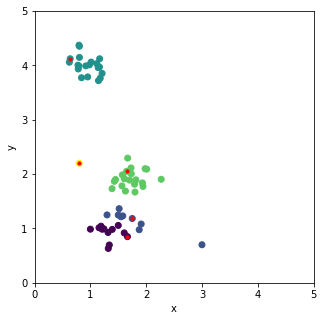

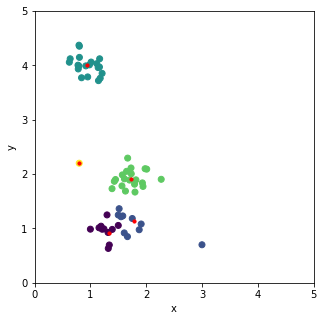

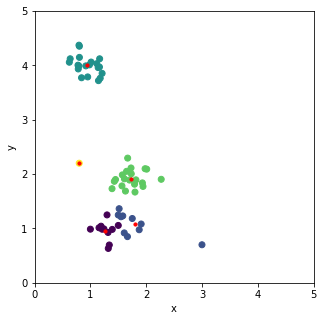

In [5]:
kmn = kmeans(plus=True)
kmn.fit(X,5)